In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm9
import seaborn as sns

kek1 = pd.read_excel('%path%', sheet_name='list1')  # add your path to data.xls
kek1.head()


,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition
0,13000000,108.0,3,2.70,16,51.000000,8,25.000000,16028,95
1,5196000,56.0,2,2.70,5,34.300000,4,8.300000,13933,558
2,64900000,159.0,3,2.70,14,84.324115,9,74.675885,6800,424
3,10000000,100.0,2,3.03,14,32.000000,13,41.000000,8098,121
4,7915000,71.6,2,2.70,24,37.972369,22,18.900000,11634,95


In [3]:
kek1.tail()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition
15586,3550000,35.30,1,2.86,15,16.300000,4,9.10,16081,29
15587,5500000,52.00,2,2.70,5,31.000000,2,6.00,6263,15
15588,9470000,72.90,2,2.75,25,40.300000,7,10.60,4489,519
15589,9700000,133.81,3,3.70,5,73.300000,3,13.83,4232,95
15590,11475000,76.75,2,3.00,17,40.703621,12,23.30,10364,602


In [4]:
print("Выполняем второй шаг. Построим гистограммы и графики box-plot для каждого из признаков")

Выполняем второй шаг. Построим гистограммы и графики box-plot для каждого из признаков


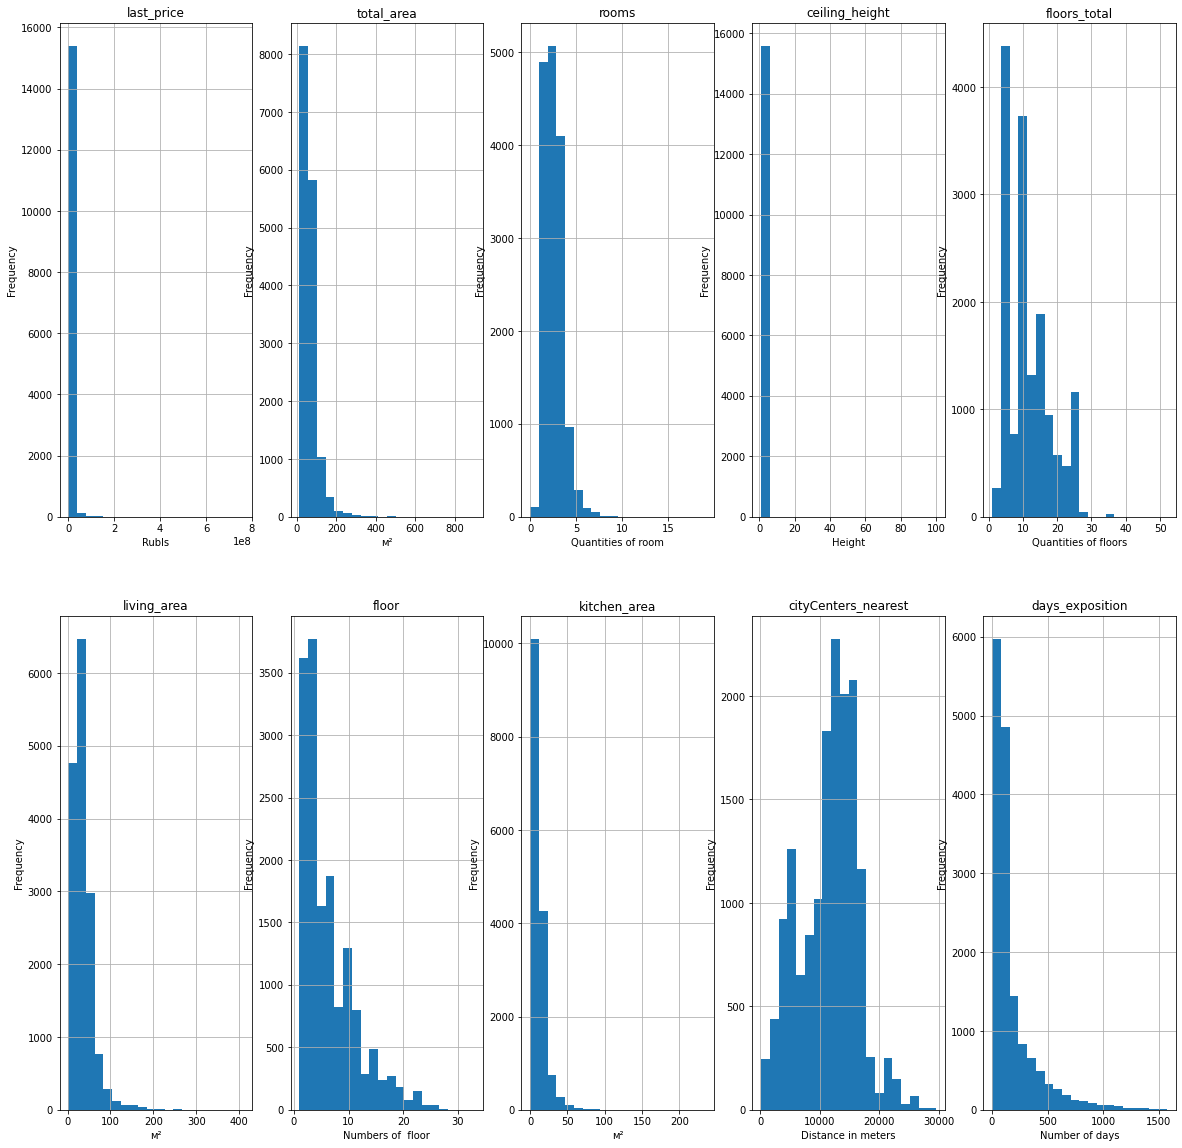

In [5]:
dict1 = {1 : 'last_price', 2 : 'total_area', 3 : 'rooms', 4 : 'ceiling_height', 5 : 'floors_total', 6 : 'living_area', 7 : 'floor', 8 : 'kitchen_area', 9 : 'cityCenters_nearest', 10 : 'days_exposition'}
dict2 = {1 : 'Rubls', 2 : 'м²', 3 : 'Quantities of room', 4 : 'Height', 5 : 'Quantities of floors', 6 : 'м²', 7 : 'Numbers of  floor', 8 : 'м²', 9 : 'Distance in meters', 10 : 'Number of days'}
plt.figure(figsize=(20, 20))
for key in dict1:
    plt.subplot(2, 5, key)
    kek1[dict1[key]].hist(bins=20)
    plt.title(dict1[key])
    plt.ylabel('Frequency')
    plt.xlabel(dict2[key])

plt.show()


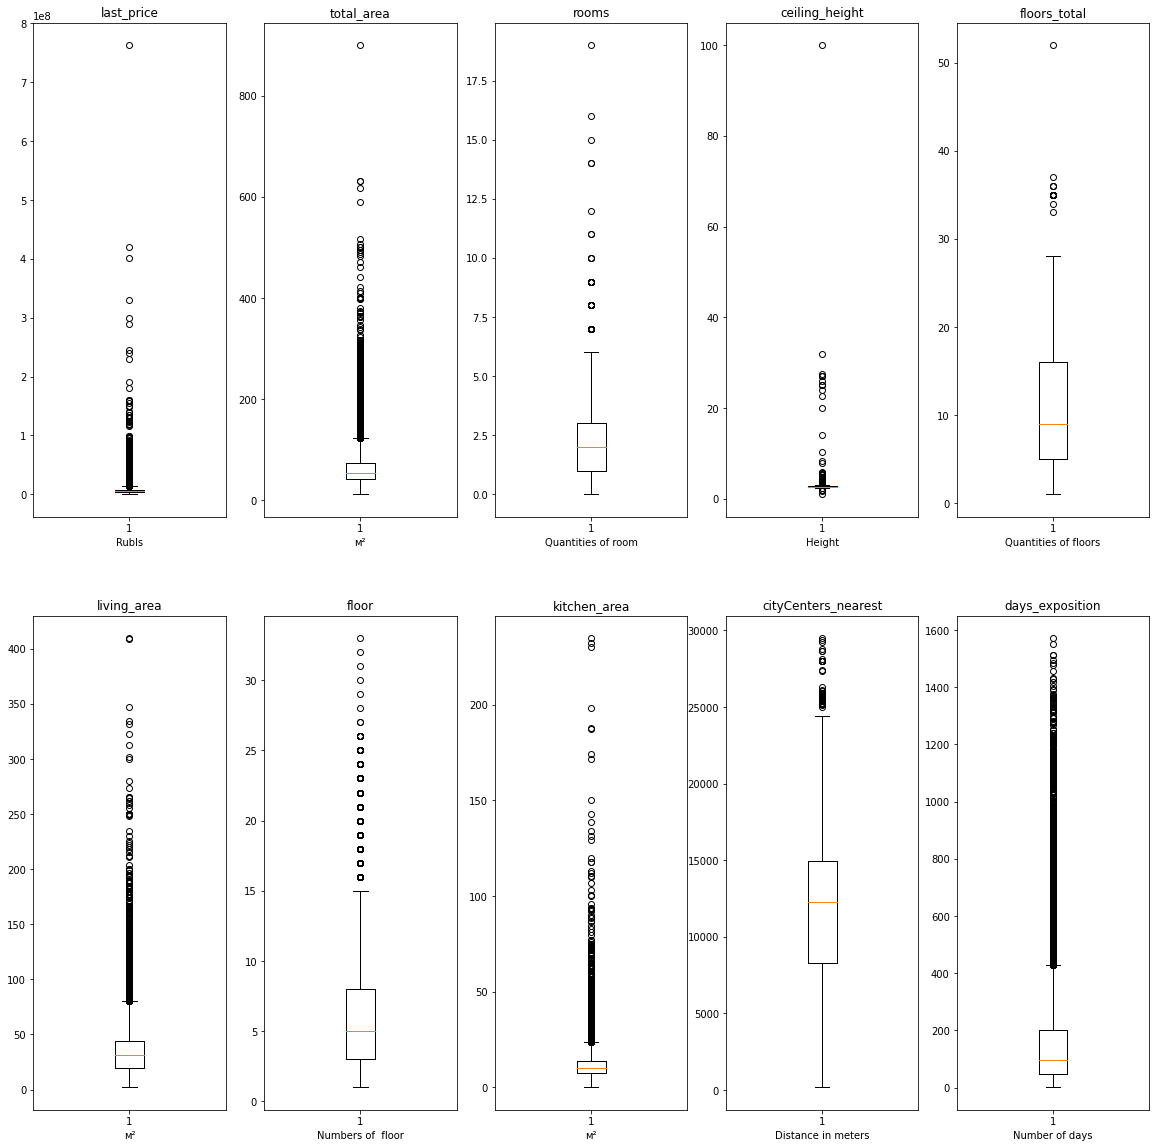

In [6]:
plt.figure(figsize=(20, 20))
for key in dict1:
    plt.subplot(2, 5, key)
    plt.boxplot(kek1[dict1[key]])
    plt.title(dict1[key])
    plt.xlabel(dict2[key])
    
plt.show()

In [7]:
print('Удалим из выборки объявления, содержащие выбросы в каждом из признаков.')

Удалим из выборки объявления, содержащие выбросы в каждом из признаков.


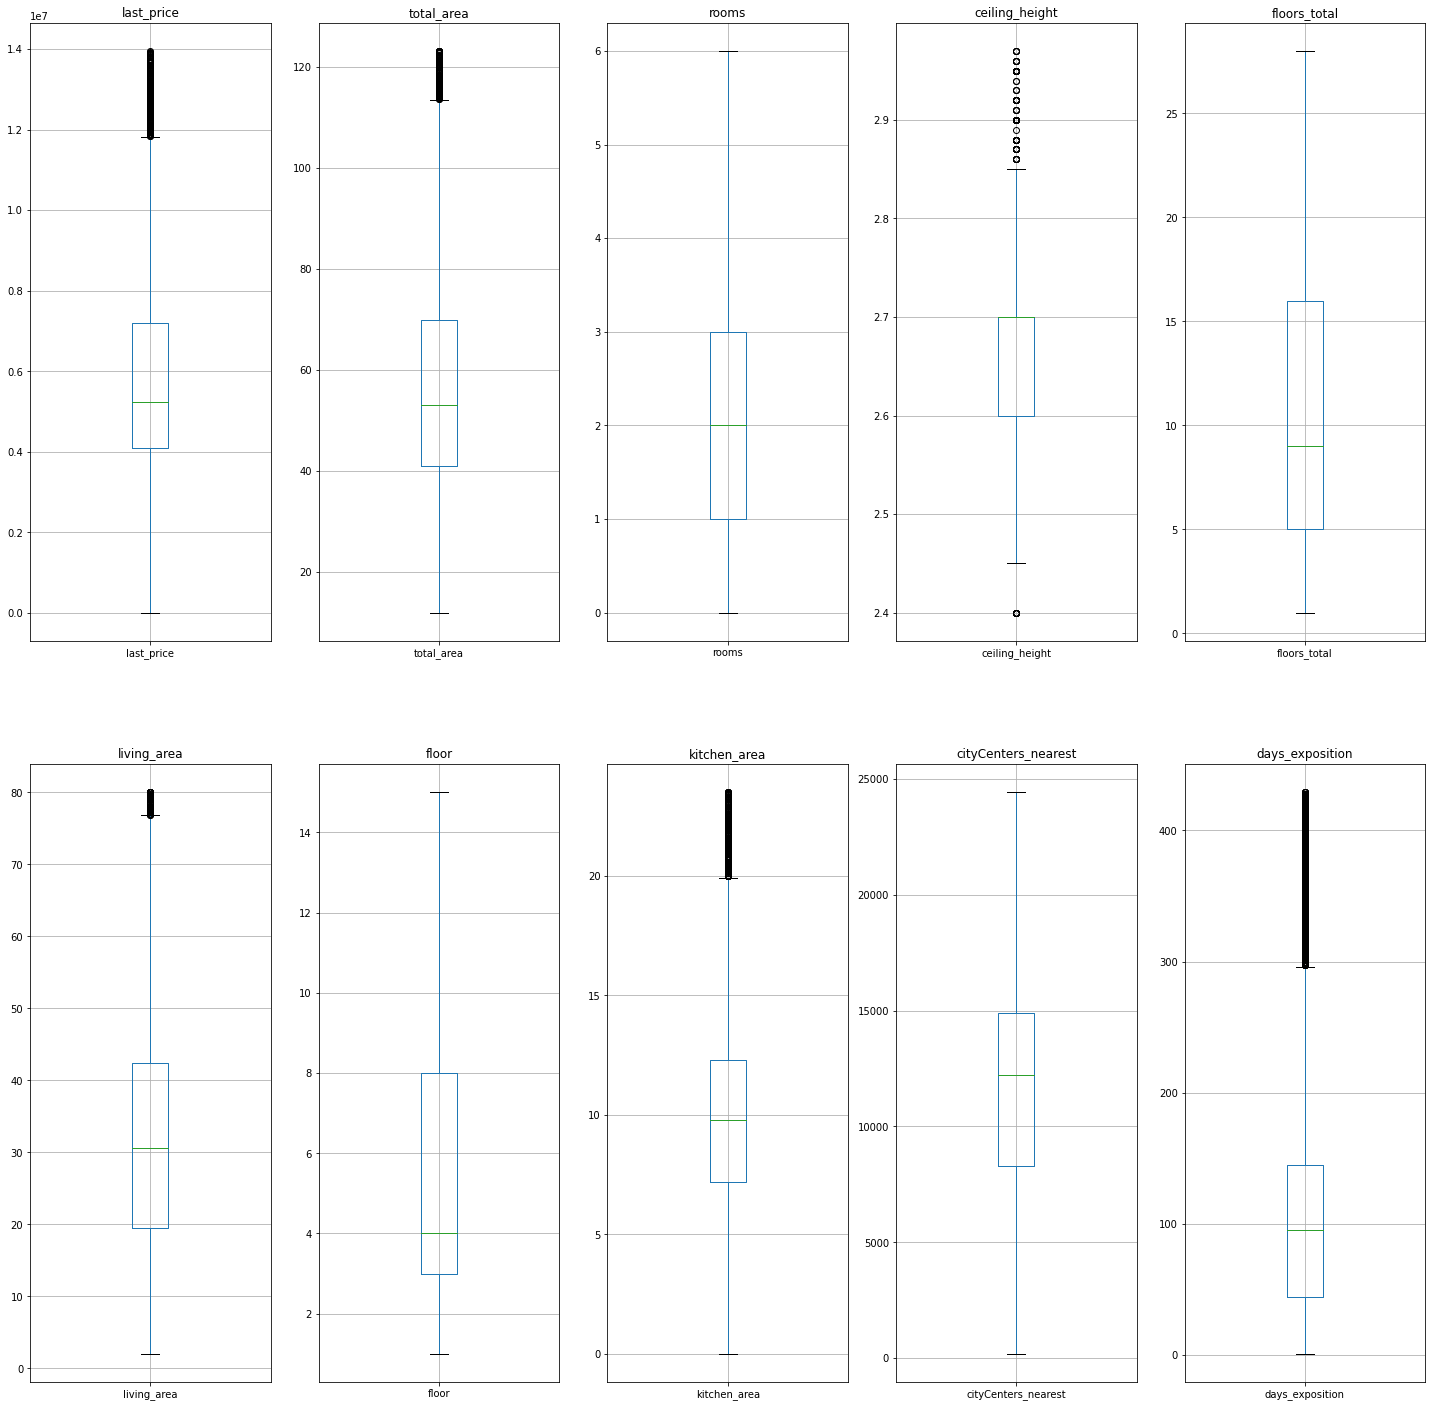

In [8]:
def del_out(kek1, column, graphic=0):
    q1 = kek1[column].quantile(0.25)
    q3 = kek1[column].quantile(0.75)

    irq = q3 - q1
    cut_out = ((q1 - 1.5*irq) <= kek1[column]) & ((q3 + 1.5*irq) >= kek1[column])
    if graphic == 1:
        plt.subplot(2, 5, key)
        kek1.loc[cut_out].boxplot([column])
        plt.title(dict1[key])
    else:
        return kek1.loc[cut_out]
        
plt.figure(figsize=(25, 25))
for key in dict1:
    del_out(kek1, dict1[key], 1)


In [23]:
lol1 = kek1['last_price'] / kek1['total_area']
print('Шаг 3. Посчитаем цену квадратного метра. Для этого мы столбец "last_price" и "total_area" поделим друг на друга') 
pd.set_option('display.float_format', '{:.2f}'.format)
print(lol1)


Шаг 3. Посчитаем цену квадратного метра. Для этого мы столбец "last_price" и "total_area" поделим друг на друга
0       120370.37
1        92785.71
2       408176.10
3       100000.00
4       110544.69
           ...   
15586   100566.57
15587   105769.23
15588   129903.98
15589    72490.85
15590   149511.40
Length: 15591, dtype: float64


In [24]:
print('Теперь посчитаем соотношение "living_area" и "total_area".')
lol2 = kek1['living_area'] / kek1['total_area']
print(lol2)

Теперь посчитаем соотношение "living_area" и "total_area".
0       0.47
1       0.61
2       0.53
3       0.32
4       0.53
        ... 
15586   0.46
15587   0.60
15588   0.55
15589   0.55
15590   0.53
Length: 15591, dtype: float64


In [25]:
print('\nА также отношение площади "kitchen_area" к "total_area".')
lol3 = kek1['kitchen_area'] / kek1['total_area']
print(lol3)


А также отношение площади "kitchen_area" к "total_area".
0       0.23
1       0.15
2       0.47
3       0.41
4       0.26
        ... 
15586   0.26
15587   0.12
15588   0.15
15589   0.10
15590   0.30
Length: 15591, dtype: float64


In [12]:
print('Шаг 4. Отвечаем на вопросы: \n')
day_exp_desc = del_out(kek1, 'days_exposition',0) ['days_exposition'].describe()
print(day_exp_desc)

Шаг 4. Отвечаем на вопросы: 

count   13997.00
mean      112.23
std        96.72
min         1.00
25%        44.00
50%        95.00
75%       145.00
max       429.00
Name: days_exposition, dtype: float64


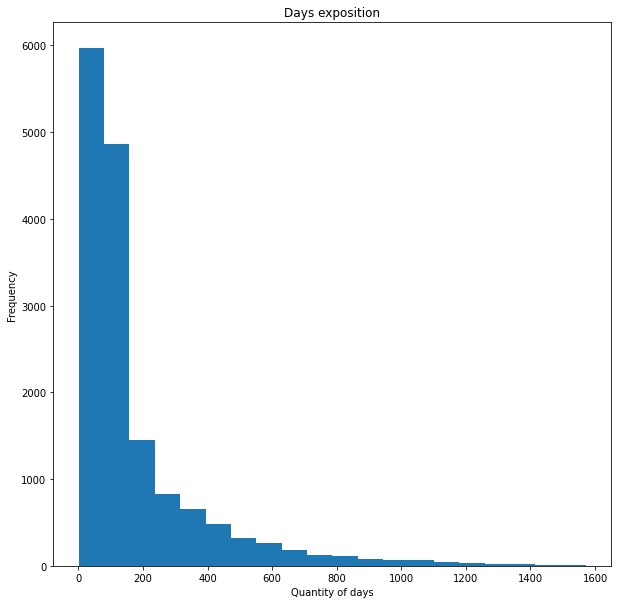

In [13]:
plt.figure(figsize=(10, 10))
kek1['days_exposition'].hist(bins=20)
plt.title('Days exposition')
plt.ylabel('Frequency')
plt.xlabel('Quantity of days')
plt.grid()
plt.show()

In [14]:
print('1) Исходя из графика можно сделать вывод, что всего максимально быстрые продажи длились 1 день, а необычно долго 429 дней.')

1) Исходя из графика можно сделать вывод, что всего максимально быстрые продажи длились 1 день, а необычно долго 429 дней.


In [15]:
c_h_desc = del_out(kek1, 'ceiling_height',0) ['ceiling_height'].describe()
print(c_h_desc)
print('------------------------------------')
t_a_desc = del_out(kek1, 'total_area',0) ['total_area'].describe()
print(t_a_desc)
print('--------------------------------')

count   13290.00
mean        2.66
std         0.10
min         2.40
25%         2.60
50%         2.70
75%         2.70
max         2.97
Name: ceiling_height, dtype: float64
------------------------------------
count   14693.00
mean       57.45
std        21.61
min        12.00
25%        41.00
50%        53.00
75%        70.00
max       123.20
Name: total_area, dtype: float64
--------------------------------


In [16]:
l_p_desc = del_out(kek1, 'last_price',0) ['last_price'].describe()
print(l_p_desc)
print('--------------------------------')

count      14216.00
mean     5950515.77
std      2487179.52
min        12190.00
25%      4100000.00
50%      5250000.00
75%      7190000.00
max     13950000.00
Name: last_price, dtype: float64
--------------------------------


In [17]:
print('2) 2,66 м - высота потолков чаще всего встречается в объявлениях о продаже\n3) 57,45 м² типичное значение общей площади квартир\n4) 5950515.77  - среднее значение стоимости квартир')

2) 2,66 м - высота потолков чаще всего встречается в объявлениях о продаже
3) 57,45 м² типичное значение общей площади квартир
4) 5950515.77  - среднее значение стоимости квартир


In [22]:
print('5) Для того чтобы понять влияет ли число комнат на общую площадь квартиры составим матрицу коэффициентов корреляции между всеми признаками')
display(kek1[['last_price','total_area','rooms','ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'cityCenters_nearest', 'days_exposition']].corr())

5) Для того чтобы понять влияет ли число комнат на общую площадь квартиры составим матрицу коэффициентов корреляции между всеми признаками


,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,cityCenters_nearest,days_exposition
last_price,1.00,0.66,0.37,0.07,-0.06,0.59,-0.00,0.45,-0.26,0.07
total_area,0.66,1.00,0.76,0.09,-0.11,0.95,-0.04,0.56,-0.34,0.13
rooms,0.37,0.76,1.00,0.05,-0.26,0.83,-0.16,0.28,-0.29,0.11
ceiling_height,0.07,0.09,0.05,1.00,-0.04,0.08,-0.02,0.06,-0.11,0.02
floors_total,-0.06,-0.11,-0.26,-0.04,1.00,-0.20,0.65,0.04,0.36,-0.04
living_area,0.59,0.95,0.83,0.08,-0.20,1.00,-0.10,0.43,-0.35,0.13
floor,-0.00,-0.04,-0.16,-0.02,0.65,-0.10,1.00,0.05,0.23,-0.03
kitchen_area,0.45,0.56,0.28,0.06,0.04,0.43,0.05,1.00,-0.19,0.08
cityCenters_nearest,-0.26,-0.34,-0.29,-0.11,0.36,-0.35,0.23,-0.19,1.00,-0.12
days_exposition,0.07,0.13,0.11,0.02,-0.04,0.13,-0.03,0.08,-0.12,1.00


In [28]:
print('И выполним сортировку по первому столбцу. Этим самым мы ответили на вопрос "влияет ли число комнат на общую площадь квартиры". Значения соответствуют столбцу "last_price"')
display(kek1[['last_price','total_area','rooms','ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'cityCenters_nearest', 'days_exposition']].corr().loc['last_price'].sort_values(ascending=False))

И выполним сортировку по первому столбцу. Этим самым мы ответили на вопрос "влияет ли число комнат на общую площадь квартиры". Значения соответствуют столбцу "last_price"


last_price             1.00
total_area             0.66
living_area            0.59
kitchen_area           0.45
rooms                  0.37
days_exposition        0.07
ceiling_height         0.07
floor                 -0.00
floors_total          -0.06
cityCenters_nearest   -0.26
Name: last_price, dtype: float64

In [20]:
print('6) На стоимость квартир в первую очередь влияет месторасположение,дальность от центра города, далее идёт расположение квартиры в доме, а именно какой этаж и площадь квартиры.')

6) На стоимость квартир в первую очередь влияет месторасположение,дальность от центра города, далее идёт расположение квартиры в доме, а именно какой этаж и площадь квартиры.


In [21]:
# если убрать комент,то график будет грузить оперативку и очень долго всё показывать и не сохранять
# print('Матрицы диаграмм рассеивания')
# pd.plotting.scatter_matrix(kek1[['last_price','total_area','rooms','ceiling_height']], figsize=(10,10))
# plt.show()